# SETUP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/CNN-MODELS-JUN-VERSION')

import numpy as np
import data_handling_new as data_handling
from tqdm import tqdm
import os

import matplotlib.pyplot as plt

plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "font.size": 14,
    # "text.usetex": True,
    "font.family": "sans-serif",
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,
    #"axes.spines.top": False,
    #"axes.spines.right": False,
    "legend.frameon": False
    #"axes.grid" : True,
    #"grid.color": "gray",
    #"grid.linestyle": "--",
    #"grid.linewidth": 0.5,
    #"grid.alpha": 0.3,
})

# Load

In [3]:
total_number_of_samples = 87419

In [5]:
luvoir_ds  = data_handling.read_tfrecord("/content/drive/MyDrive/CNN-MODELS-JUN-VERSION/DATA/test.tfrecord", telescope="LUVOIR", batch_size=1)
y_luvoir = []
for y_batch in luvoir_ds:
    y_luvoir.append(y_batch)

In [6]:
root_folder = '/content/drive/MyDrive/CNN-MODELS-JUN-VERSION/DATA/distances/'
files = os.listdir(root_folder)

In [7]:
distances = {
    'luvoir' : {
        'modern' : {
            'physical' : np.load(root_folder+'dist_phys_luvoir_modern.npy', allow_pickle=True),
            'main' : np.load(root_folder+'dist_main_luvoir_modern.npy', allow_pickle=True),
            'other' : np.load(root_folder+'dist_other_luvoir_modern.npy', allow_pickle=True)
        },
        'proterozoic' : {
            'physical' : np.load(root_folder+'dist_phys_luvoir_proterozoic.npy', allow_pickle=True),
            'main' : np.load(root_folder+'dist_main_luvoir_proterozoic.npy', allow_pickle=True),
            'other' : np.load(root_folder+'dist_other_luvoir_proterozoic.npy', allow_pickle=True)
        },
        'archean' : {
            'physical' : np.load(root_folder+'dist_phys_luvoir_archean.npy', allow_pickle=True),
            'main' : np.load(root_folder+'dist_main_luvoir_archean.npy', allow_pickle=True),
            'other' : np.load(root_folder+'dist_other_luvoir_archean.npy', allow_pickle=True)
        },
    },
    'habex' : {
        'modern' : {
            'physical' : np.load(root_folder+'dist_phys_habex_modern.npy', allow_pickle=True),
            'main' : np.load(root_folder+'dist_main_habex_modern.npy', allow_pickle=True),
            'other' : np.load(root_folder+'dist_other_habex_modern.npy', allow_pickle=True)
        },
        'proterozoic' : {
            'physical' : np.load(root_folder+'dist_phys_habex_proterozoic.npy', allow_pickle=True),
            'main' : np.load(root_folder+'dist_main_habex_proterozoic.npy', allow_pickle=True),
            'other' : np.load(root_folder+'dist_other_habex_proterozoic.npy', allow_pickle=True)
        },
        'archean' : {
            'physical' : np.load(root_folder+'dist_phys_habex_archean.npy', allow_pickle=True),
            'main' : np.load(root_folder+'dist_main_habex_archean.npy', allow_pickle=True),
            'other' : np.load(root_folder+'dist_other_habex_archean.npy', allow_pickle=True)
        },
    }
}

In [8]:
modern_start_index = 0
proterozoic_start_index = 35503
archean_start_index = 58860

# Distances

In [9]:
distances['luvoir']['modern']['main'].shape

(35503, 2)

In [10]:
distances['luvoir']['proterozoic']['main'].shape

(23357, 2)

In [11]:
distances['luvoir']['archean']['main'].shape

(28559, 2)

In [40]:
era = 'archean'

phys_distances_luv = distances['luvoir'][era]['physical']
main_distances_luv = distances['luvoir'][era]['main']
other_distances_luv = distances['luvoir'][era]['other']

phys_distances_hab = distances['habex'][era]['physical']
main_distances_hab = distances['habex'][era]['main']
other_distances_hab = distances['habex'][era]['other']

In [41]:
phys_distances_luv[:,0]

array([-0.06835085,  0.06742013, -0.46204424, ...,  0.5254907 ,
        0.40519464,  0.51739711])

In [42]:
phys_distances_hab[:,0]

array([-0.0898236 , -0.31813818, -0.31363606, ...,  0.074531  ,
        0.13725841,  0.5157063 ])

In [43]:
def get_total_distances(phys, main, other):
    total_distance = []

    n_samples = phys.shape[0]

    for i in range(n_samples):
        total_phys = [phys[i][j]**2 for j in range(4)]
        # total_main = [main_distances[i][j]**2 for j in range(2)]
        O2 = main[i][0]**2
        O3 = 2*main[i][1]**2
        total_main = [O2, O3]
        total_other = [other[i][j]**2 for j in range(4)]

        total_i = np.sqrt(sum(total_phys) + sum(total_main) + sum(total_other))

        total_distance.append(total_i)

    return np.array(total_distance)

In [44]:
total_distance_luv = get_total_distances(phys_distances_luv, main_distances_luv, other_distances_luv)
total_distance_hab = get_total_distances(phys_distances_hab, main_distances_hab, other_distances_hab)

In [45]:
total_distances_summed = total_distance_luv + total_distance_hab

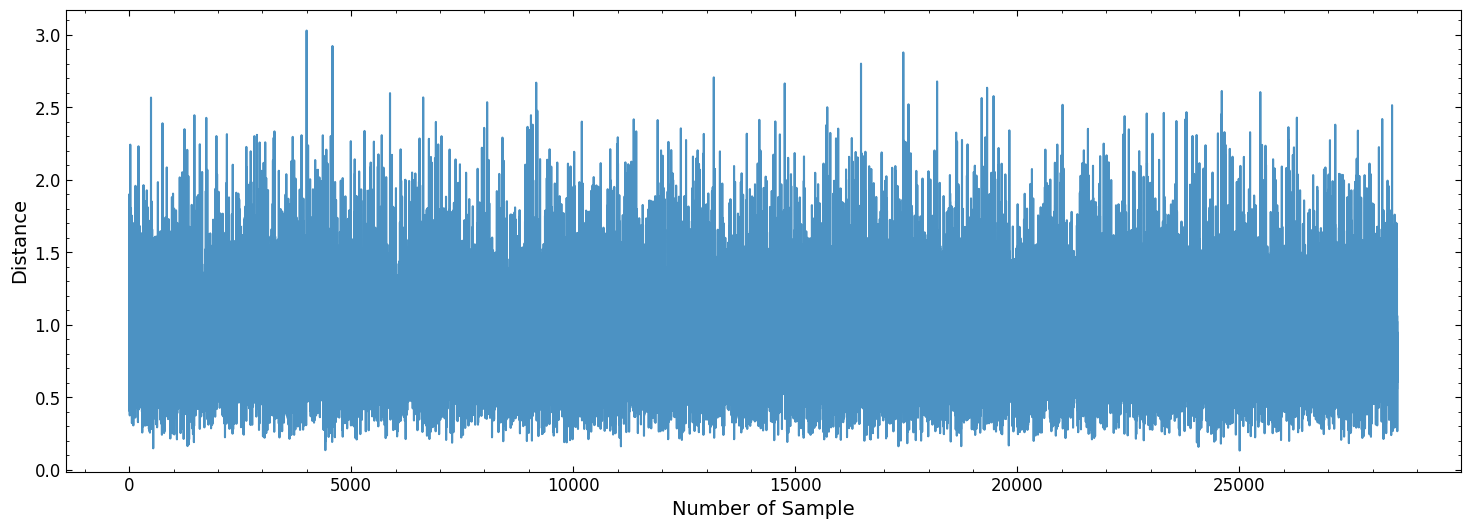

In [46]:
alpha = 0.8
cut = -1
plt.figure(figsize=(18,6))
plt.plot(total_distances_summed[:cut], alpha=alpha)
plt.xlabel('Number of Sample')
plt.ylabel('Distance')
plt.show()

In [47]:
# THE BEST MODERN = 10785
# THE BEST PROTEROZOIC = 8925
# THE BEST ARCHEAN = 25006
np.where(total_distances_summed == total_distances_summed.min())

(array([25006]),)

In [49]:
# THE WORST MORDERN = 25639
# THE WORST MORDERN = 21497
# THE WORST MORDERN = 3995
np.where(total_distances_summed == total_distances_summed.max())

(array([3995]),)

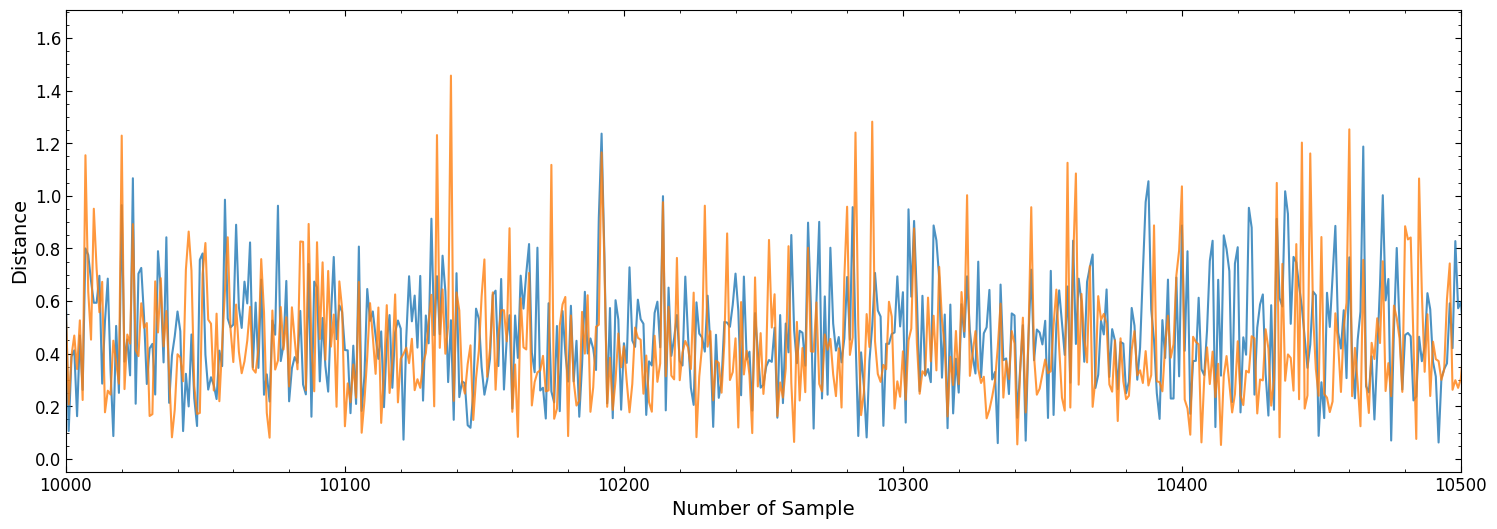

In [50]:
alpha = 0.8
cut = -1

plt.figure(figsize=(18,6))
plt.plot(total_distance_luv[:cut], alpha=alpha)
plt.plot(total_distance_hab[:cut], c='C1', alpha=alpha)
plt.xlim(10000, 10500)
plt.xlabel('Number of Sample')
plt.ylabel('Distance')
plt.show()

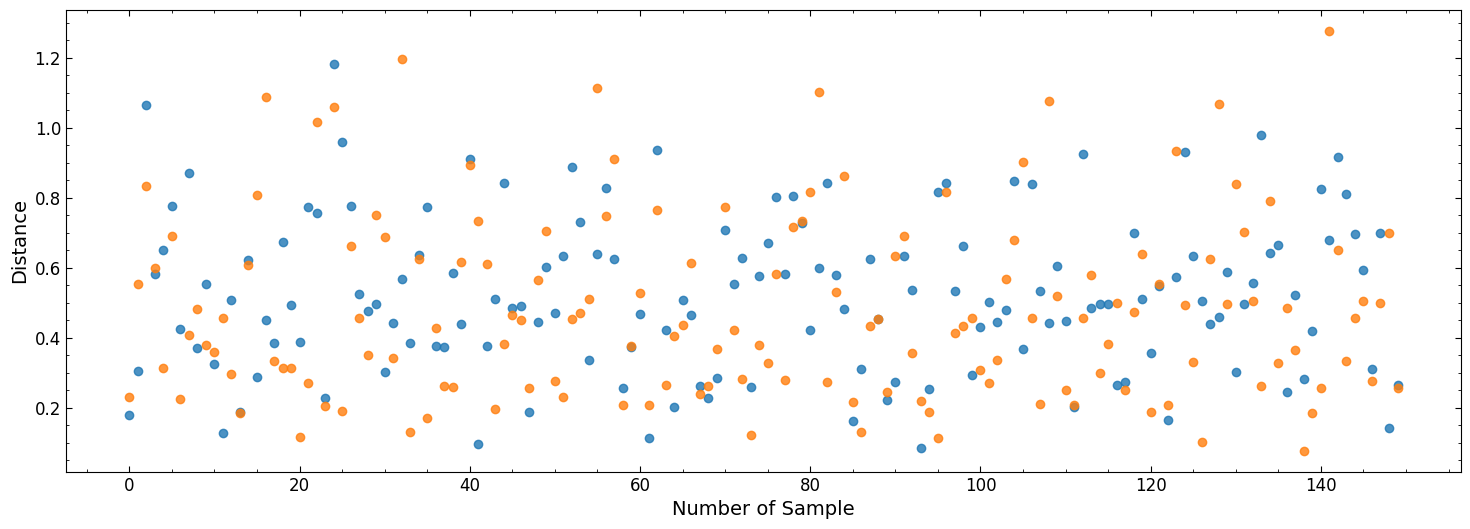

In [51]:
alpha = 0.8
cut = 150
bins = np.linspace(0, len(total_distance_luv)-1, len(total_distance_luv))

plt.figure(figsize=(18,6))
plt.scatter(bins[:cut], total_distance_luv[:cut], alpha=alpha)
plt.scatter(bins[:cut], total_distance_hab[:cut], c='C1', alpha=alpha)
plt.xlabel('Number of Sample')
plt.ylabel('Distance')
plt.show()